In [27]:
import xarray as xr
import numpy as np
import skimage
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

In [28]:
ds_currents = xr.open_dataset('E:\Proyecto de Grado\Data\corrientes_u_v_5m_enero1993_diciembre2020.nc')
ds_monthly = ds_currents.groupby('time.month').mean()
ds_monthly

<xarray.Dataset>
Dimensions:    (depth: 5, latitude: 205, month: 12, longitude: 372)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 5.078
  * latitude   (latitude) float32 7.0 7.083 7.167 7.25 ... 23.83 23.92 24.0
  * longitude  (longitude) float32 -89.92 -89.83 -89.75 ... -59.17 -59.08 -59.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    vo         (month, depth, latitude, longitude) float32 0.1063 ... 0.02531
    uo         (month, depth, latitude, longitude) float32 0.1706 ... -0.002202
Attributes: (12/17)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

<h1>Enero</h1>

In [29]:
ds_enero = ds_monthly.sel({'month': [1]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


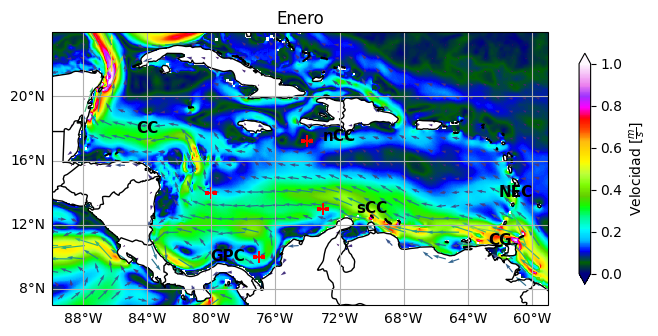

In [30]:
lat = ds_enero['latitude'].to_numpy()
lon = ds_enero['longitude'].to_numpy()
V = ds_enero["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_enero["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=70)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())


# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Enero")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Enero.png", dpi = 1000, bbox_inches = 'tight')

<h1>Febrero</h1>

In [31]:
ds_feb = ds_monthly.sel({'month': [2]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


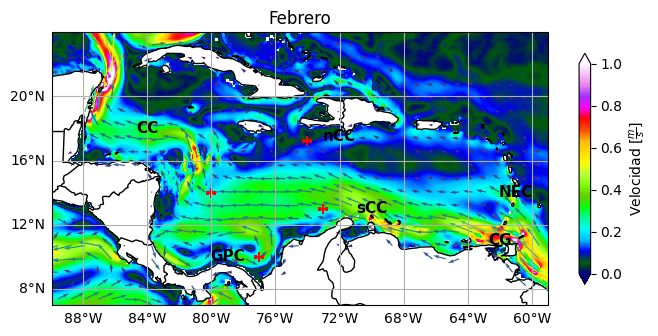

In [32]:
lat = ds_feb['latitude'].to_numpy()
lon = ds_feb['longitude'].to_numpy()
V = ds_feb["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_feb["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())


# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Febrero")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Febrero.png", dpi = 1000, bbox_inches = 'tight')

<h1>Marzo</h1>

In [33]:
ds_mar = ds_monthly.sel({'month': [3]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


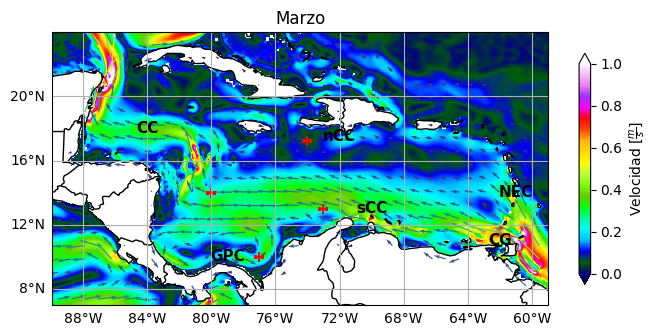

In [34]:
lat = ds_mar['latitude'].to_numpy()
lon = ds_mar['longitude'].to_numpy()
V = ds_mar["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_mar["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())

# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Marzo")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Marzo.png", dpi = 1000, bbox_inches = 'tight')

<h1>Abril</h1>

In [35]:
ds_abr = ds_monthly.sel({'month': [4]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


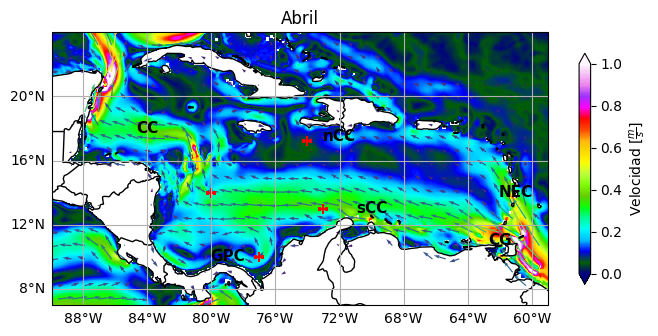

In [36]:
lat = ds_abr['latitude'].to_numpy()
lon = ds_abr['longitude'].to_numpy()
V = ds_abr["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_abr["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())


# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Abril")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Abril.png", dpi = 1000, bbox_inches = 'tight')

<h1>Mayo</h1>

In [37]:
ds_may = ds_monthly.sel({'month': [5]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


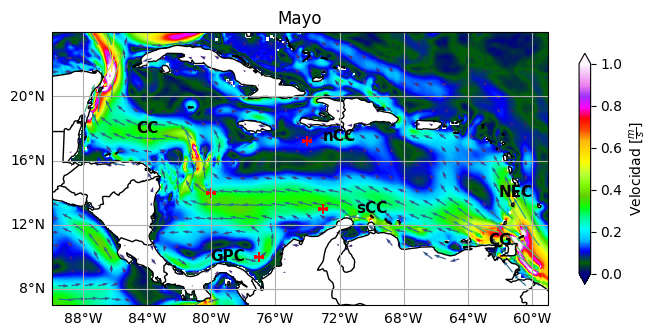

In [38]:
lat = ds_may['latitude'].to_numpy()
lon = ds_may['longitude'].to_numpy()
V = ds_may["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_may["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())


# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Mayo")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Mayo.png", dpi = 1000, bbox_inches = 'tight')

<h1>Junio</h1>

In [39]:
ds_jun = ds_monthly.sel({'month': [6]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


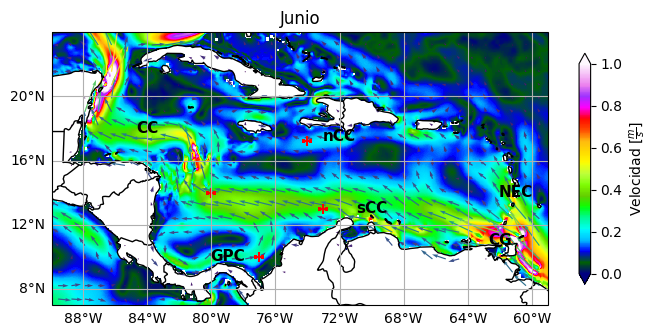

In [40]:
lat = ds_jun['latitude'].to_numpy()
lon = ds_jun['longitude'].to_numpy()
V = ds_jun["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_jun["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())


# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Junio")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Junio.png", dpi = 1000, bbox_inches = 'tight')

<h1>Julio</h1>

In [41]:
ds_jul = ds_monthly.sel({'month': [7]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


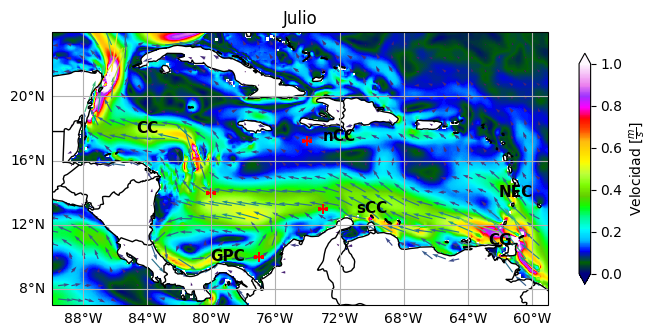

In [42]:
lat = ds_jul['latitude'].to_numpy()
lon = ds_jul['longitude'].to_numpy()
V = ds_jul["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_jul["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())


# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Julio")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Julio.png", dpi = 1000, bbox_inches = 'tight')

<h1>Agosto</h1>

In [43]:
ds_agos = ds_monthly.sel({'month': [8]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


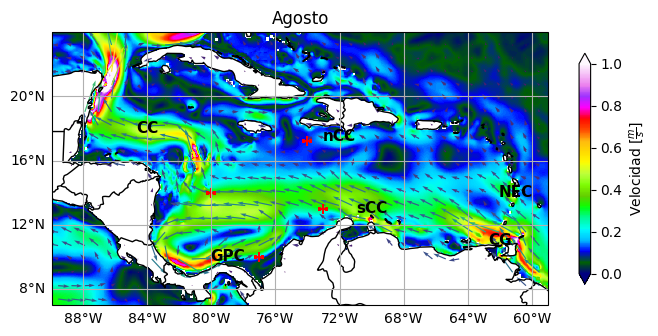

In [44]:
lat = ds_agos['latitude'].to_numpy()
lon = ds_agos['longitude'].to_numpy()
V = ds_agos["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_agos["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())


# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Agosto")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Agosto.png", dpi = 1000, bbox_inches = 'tight')

<h1>Septiembre</h1>

In [45]:
ds_sep = ds_monthly.sel({'month': [9]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


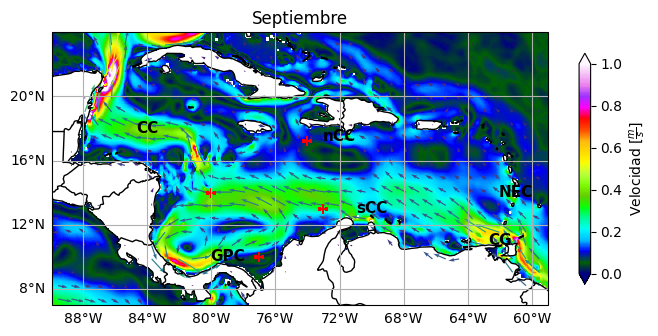

In [46]:
lat = ds_sep['latitude'].to_numpy()
lon = ds_sep['longitude'].to_numpy()
V = ds_sep["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_sep["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())


# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Septiembre")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Septiembre.png", dpi = 1000, bbox_inches = 'tight')

<h1>Octubre</h1>

In [47]:
ds_oct = ds_monthly.sel({'month': [10]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


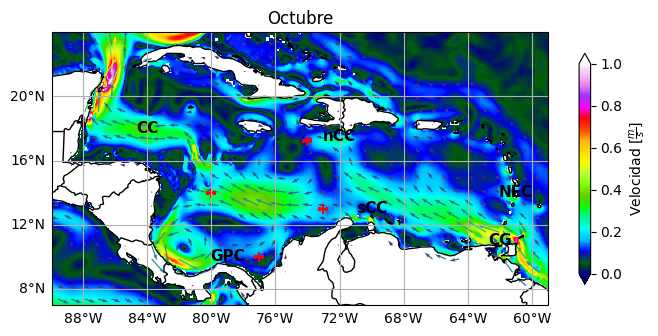

In [48]:
lat = ds_oct['latitude'].to_numpy()
lon = ds_oct['longitude'].to_numpy()
V = ds_oct["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_oct["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())


# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Octubre")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Octubre.png", dpi = 1000, bbox_inches = 'tight')

<h1>Noviembre</h1>

In [49]:
ds_nov = ds_monthly.sel({'month': [11]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


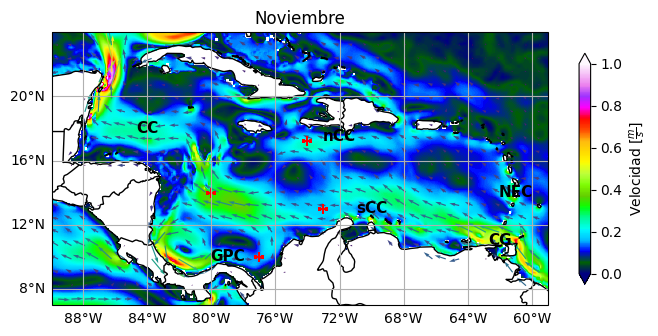

In [50]:
lat = ds_nov['latitude'].to_numpy()
lon = ds_nov['longitude'].to_numpy()
V = ds_nov["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_nov["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())


# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Noviembre")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Noviembre.png", dpi = 1000, bbox_inches = 'tight')

<h1>Diciembre</h1>

In [51]:
ds_dic = ds_monthly.sel({'month': [12]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


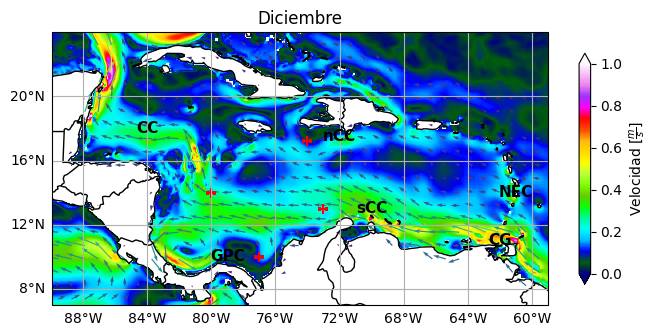

In [52]:
lat = ds_dic['latitude'].to_numpy()
lon = ds_dic['longitude'].to_numpy()
V = ds_dic["vo"].mean(dim=["month","depth"]).to_numpy()
U = ds_dic["uo"].mean(dim=["month","depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

# Define las coordenadas y las marcas para los puntos
lat_c = [11, 14, 13, 17.5, 10, 18]
lon_c = [-62, -61, -70, -72, -79, -84 ]
marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

# Grafica las marcas con las coordenadas correspondientes usando plt.text
for i, texto in enumerate(marcas):
    ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())


# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Diciembre")
plt.show()

fig.savefig(r"E:\Proyecto de Grado\Imagenes\Mensual_Promedio\Diciembre.png", dpi = 1000, bbox_inches = 'tight')